In [1]:
require(data.table)
require(ggplot2)
require(TSrepr)
require(TSdist)
require(dtw)
require(Rcpp)

Loading required package: data.table

Warning message:
"package 'data.table' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Loading required package: TSrepr

Warning message:
"package 'TSrepr' was built under R version 4.0.5"
Loading required package: TSdist

Warning message:
"package 'TSdist' was built under R version 4.0.5"
Loading required package: proxy

Warning message:
"package 'proxy' was built under R version 4.0.5"

Attaching package: 'proxy'


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded TSdist v3.7. See ?TSdist for help, citation("TSdist") for use in publication.


Loading required package: dtw

Warning message:
"package 'dtw' was built under R version 4.0.5"
Loaded dtw v1.22-3. See ?

In [2]:
# assuming you have the data folder in your working directory in the following format:
# 'working_directory/ClassificationData/dataset_name/'
current_folder=getwd()
dataset='Trace'
main_path=sprintf('%s/ClassificationData/%s/%s',current_folder,dataset,dataset)

dist_path=sprintf('%s/ClassificationData/%s/distances/%s',current_folder,dataset,dataset)

train_data_path=sprintf('%s_TRAIN.txt',main_path)
traindata=as.matrix(fread(train_data_path))
traindata_rep = fread(train_data_path) ## for representations, class data needs to be hold.

test_data_path=sprintf('%s_TEST.txt',main_path)
testdata=as.matrix(fread(test_data_path))
testdata_rep = fread(test_data_path)
#first column is the class variable
trainclass=traindata[,1] # takes -1 and 1
testclass=testdata[,1] # takes -1 and 1

#drop first column
traindata=traindata[,2:ncol(traindata)]
testdata=testdata[,2:ncol(testdata)]

# instance characteristics
tlength=ncol(traindata)
n_series_train=nrow(traindata)
n_series_test=nrow(testdata)

In [3]:
##### K = 1  
## raw + euclidian
## raw + DTW
## raw + LCSS 
## raw + ERP 
##### K = 3 
## raw + euclidian 
## raw + DTW 
## raw + LCSS 
## raw + ERP 
##### K = 5
## raw + euclidian
## raw + DTW
## raw + LCSS 
## raw + ERP

### Representations

Prepare data as long format for representations 

In [4]:
setnames(traindata_rep,'V1','class')

traindata_rep <- traindata_rep[order(class)]

head(traindata_rep)

traindata_rep[,class:=as.character(class)]
traindata_rep[,id:=1:.N]
long_train=melt(traindata_rep,id.vars=c('id','class'))

long_train[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train=long_train[,list(id,class,time,value)]
long_train=long_train[order(id,time)]

long_train

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5440704,0.6578630,0.6112391,0.5454131,0.5321561,0.5930125,0.5952802,0.5382770,0.5634290,...,0.5882259,0.5778859,0.5980693,0.5836949,0.6028774,0.5542635,0.5141473,0.6037730,0.5963312,0.5832243
1,0.5413721,0.5719079,0.5621467,0.5209509,0.5274937,0.6040431,0.5405210,0.5803829,0.5005821,...,0.5860001,0.6264716,0.6096163,0.5542846,0.5394653,0.5335154,0.5577524,0.5078255,0.5137685,0.5281315
1,0.6459920,0.5800948,0.6160642,0.6107110,0.6185952,0.6127442,0.5640464,0.6205575,0.5379419,...,0.5760033,0.6129641,0.5362987,0.6320003,0.6460588,0.6605378,0.6122058,0.5841390,0.6478545,0.5929200
1,0.6171270,0.6210609,0.6639603,0.6788703,0.6661086,0.6533468,0.6113359,0.6312183,0.6069728,...,0.4882907,0.5067076,0.4862489,0.5577329,0.5221067,0.5609632,0.5310610,0.5164287,0.5417239,0.5670191
1,0.5818801,0.6017612,0.6185541,0.5654274,0.5562883,0.5802261,0.5584894,0.5954150,0.5661896,...,0.5388786,0.4905306,0.5475503,0.5292855,0.5301839,0.6069388,0.5043960,0.6197934,0.6205053,0.5911045
1,0.6055346,0.6215709,0.6140195,0.6604722,0.6158476,0.5849079,0.7010077,0.6218884,0.6363716,...,0.6583823,0.5944260,0.6234295,0.5959359,0.6468612,0.4870948,0.5797961,0.6288889,0.5415227,0.6113597


id,class,time,value
<int>,<chr>,<dbl>,<dbl>
1,1,1,0.5440704
1,1,2,0.6578630
1,1,3,0.6112391
1,1,4,0.5454131
1,1,5,0.5321561
1,1,6,0.5930125
1,1,7,0.5952802
1,1,8,0.5382770
1,1,9,0.5634290


#### Piecewise Aggregate Approximation

##### Segment Length = 5

In [5]:
# Piecewise Aggregate Approximation
segment_length=5

# sort long table just in case
long_train=long_train[order(id,time)]

paa_results <- vector('list',n_series_train)
for (i in 1:n_series_train){

data_ts=long_train[id==i]$value
paa_rep=repr_paa(data_ts, segment_length, meanC)
#plot(paa_rep,type='l')
paa_results[[i]] <- paa_rep 
}
paa_list <- vector('list', n_series_train)
for (i in 1:n_series_train) {
  
    paa_list[[i]] = as.data.table(t(paa_results[[i]]))
  
    }
paa_fit_5 <- rbindlist(paa_list) 
paa_fit_5


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5781483,0.5771910,0.6074151,0.6101428,0.5895897,0.6291376,0.6420346,0.6219992,0.6243159,0.6249791,...,0.57990537,0.5952731,0.5536879,0.5649532,0.5707425,0.5781178,0.6030527,0.6094768,0.5901507,0.5703479
0.5447743,0.5646683,0.5306090,0.5706730,0.5608947,0.5787209,0.5647890,0.5361653,0.5666280,0.5968361,...,0.54469451,0.5558083,0.5404976,0.5396845,0.5609767,0.5302752,0.5337962,0.5513705,0.5831676,0.5281987
0.6142914,0.5942764,0.5773962,0.6150510,0.5924052,0.6154674,0.6268629,0.6118975,0.6305029,1.0538259,...,0.53282041,0.6125206,0.5923589,0.5881910,0.6058623,0.5815554,0.6005372,0.5973833,0.6006650,0.6195314
0.6494254,0.6306168,0.6111617,0.6300365,0.6104362,0.6361464,0.6316360,0.6251528,0.6070866,0.6170750,...,0.09896644,0.2029390,0.2945018,0.3438885,0.4229548,0.4629660,0.4810566,0.4637252,0.5122174,0.5434392
0.5847822,0.5758944,0.5475803,0.5641877,0.5728544,0.5747782,0.5931642,0.6000539,0.5716446,0.5758193,...,0.48082799,0.4820368,0.5089679,0.5151238,0.5393408,0.5242116,0.5781355,0.5381177,0.5272858,0.5885476
0.6234890,0.6309031,0.6240886,0.6186309,0.6351903,0.6192768,0.5838556,0.6230488,0.6002564,0.5830752,...,0.47443769,0.5232615,0.5440363,0.5368210,0.5357523,0.5664413,0.5947970,0.5905267,0.6238070,0.5697324
0.6253264,0.6066439,0.6254636,0.6436456,0.6183480,0.5886866,0.6187619,0.6148875,0.6027821,0.6205486,...,0.46386751,0.4808598,0.5184003,0.5376376,0.5381801,0.5682560,0.5796697,0.5550606,0.6042700,0.6031929
0.5664048,0.5861587,0.6102511,0.6167857,0.5872426,0.5897709,0.5945187,0.6321338,0.6363234,0.6558235,...,0.58671842,0.5856008,0.5821293,0.5916294,0.6007524,0.5696919,0.5750830,0.5872734,0.5793683,0.5984453
0.5898186,0.6216568,0.6343278,0.6390229,0.6226594,0.6401753,0.6358862,0.6091440,0.5994716,0.6238038,...,0.30071588,0.3641629,0.4033952,0.4683202,0.4843155,0.5191102,0.5349826,0.5407390,0.5791777,0.6030157


#### Fused Lasso

In [6]:
require(genlasso)
lasso_results <- vector("list",n_series_train)

for(i in 1:n_series_train){
  selected_dt <- long_train[id == i]
  selected_dt <- as.matrix(selected_dt[,4], rownames=FALSE)
  flasso <- trendfilter(selected_dt, ord=0)
  cv <- cv.trendfilter(flasso)
     
    #print(paste0(i,'.Time Series' ))
    #print(paste0('minimum crossvalidated error:',cv$lambda.min))
    #print(paste0('1se error:',cv$lambda.min))
  lasso_results[[i]] <- predict.genlasso(flasso, cv$lambda.min)
  
}


Loading required package: genlasso

Warning message:
"package 'genlasso' was built under R version 4.0.5"
Loading required package: Matrix

Loading required package: igraph

Warning message:
"package 'igraph' was built under R version 4.0.5"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold

In [7]:
lasso_dt = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
lasso_dt[[i]] =as.data.table(t(lasso_results[[i]]$fit))
}
lasso_fit_dt = rbindlist(lasso_dt)
head(lasso_fit_dt)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5452519,0.6555001,0.6112391,0.5454131,0.5345190,0.5929649,0.5929649,0.5406399,0.5634290,0.5959565,...,0.5858630,0.5802488,0.5957064,0.5860578,0.6005145,0.5542635,0.5165102,0.6014101,0.5963312,0.5844057
0.5415983,0.5714554,0.5621467,0.5214034,0.5274937,0.6035906,0.5409735,0.5799304,0.5010346,0.5973600,...,0.5860001,0.6260191,0.6096163,0.5542846,0.5394653,0.5339679,0.5573000,0.5082780,0.5137685,0.5279053
0.6237060,0.6076419,0.6076419,0.6076419,0.6076419,0.6076419,0.5923020,0.5923020,0.5825139,0.6004895,...,0.5901874,0.5901874,0.5808707,0.6313416,0.6313416,0.6313416,0.6148513,0.6148513,0.6148513,0.6148513
0.6223170,0.6223170,0.6639603,0.6660432,0.6660432,0.6533468,0.6212771,0.6212771,0.6198653,0.6373179,...,0.4882907,0.4964782,0.4964782,0.5448405,0.5349991,0.5480707,0.5310610,0.5293212,0.5417239,0.5605728
0.5936805,0.5983572,0.5983572,0.5710080,0.5710080,0.5710080,0.5710080,0.5723853,0.5723853,0.5723853,...,0.5276762,0.5141314,0.5356733,0.5356733,0.5356732,0.5833379,0.5279969,0.6083489,0.6083489,0.6029050
0.6186370,0.6186370,0.6186370,0.6309001,0.6158476,0.6144800,0.6714356,0.6291300,0.6291300,0.6130667,...,0.6288102,0.6144545,0.6144545,0.6144545,0.6172891,0.5166669,0.5797961,0.5993167,0.5710949,0.5965736


#### Classification Trees

#### Max Depth 5

In [8]:
library(caret)
library(rpart)
predictions= vector('list', n_series_train)
for(j in 1:n_series_train){
   
selected_dt <- long_train[id == j]

ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)
fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = 5),
                   metric = 'RMSE',
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    
predictions[[j]] <- predict(fit_tree,selected_dt)

}
prediction_list = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

tree_fit_dt_5 = rbindlist(prediction_list)
tree_fit_dt_5

Warning message:
"package 'caret' was built under R version 4.0.5"
Loading required package: lattice



1,2,3,4,5,6,7,8,9,10,...,266,267,268,269,270,271,272,273,274,275
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,...,0.5927912,0.5927912,0.5927912,0.5927912,0.5927912,0.5927912,0.5927912,0.5927912,0.5927912,0.5927912
0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,...,0.5442139,0.5442139,0.5442139,0.5442139,0.5442139,0.5442139,0.5442139,0.5442139,0.5442139,0.5442139
0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,...,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982
0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,...,0.5004777,0.5004777,0.5004777,0.5004777,0.5004777,0.5004777,0.5004777,0.5004777,0.5004777,0.5004777
0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,...,0.5313543,0.5313543,0.5313543,0.5313543,0.5313543,0.5313543,0.5313543,0.5313543,0.5313543,0.5313543
0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,...,0.5890609,0.5890609,0.5890609,0.5890609,0.5890609,0.5890609,0.5890609,0.5890609,0.5890609,0.5890609
0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,...,0.5822414,0.5822414,0.5822414,0.5822414,0.5822414,0.5822414,0.5822414,0.5822414,0.5822414,0.5822414
0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,...,0.5860440,0.5860440,0.5860440,0.5860440,0.5860440,0.5860440,0.5860440,0.5860440,0.5860440,0.5860440
0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,...,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819


#### Max Depth 7

In [9]:
library(caret)
library(rpart)
predictions= vector('list', n_series_train)
for(j in 1:n_series_train){
   
selected_dt <- long_train[id == j]

ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)
fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = 7),
                   metric = 'RMSE',
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    
predictions[[j]] <- predict(fit_tree,selected_dt)

}
prediction_list = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

tree_fit_dt_7 = rbindlist(prediction_list)
tree_fit_dt_7

1,2,3,4,5,6,7,8,9,10,...,266,267,268,269,270,271,272,273,274,275
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,0.5776697,...,0.5800652,0.5800652,0.5800652,0.5800652,0.5800652,0.5800652,0.5800652,0.5800652,0.5800652,0.5800652
0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,0.5444955,...,0.5589801,0.5589801,0.5589801,0.5589801,0.5589801,0.5589801,0.5589801,0.5589801,0.5589801,0.5589801
0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,0.5934994,...,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982,0.6100982
0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,0.6400211,...,0.5278283,0.5278283,0.5278283,0.5278283,0.5278283,0.5278283,0.5278283,0.5278283,0.5278283,0.5278283
0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,0.5783949,...,0.5591073,0.5591073,0.5591073,0.5591073,0.5591073,0.5591073,0.5591073,0.5591073,0.5591073,0.5591073
0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,0.6223350,...,0.5982075,0.5982075,0.5982075,0.5982075,0.5982075,0.5982075,0.5982075,0.5982075,0.5982075,0.5982075
0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,0.6159852,...,0.6037314,0.6037314,0.6037314,0.6037314,0.6037314,0.6037314,0.6037314,0.6037314,0.6037314,0.6037314
0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,0.5762818,...,0.5925594,0.5925594,0.5925594,0.5925594,0.5925594,0.5925594,0.5925594,0.5925594,0.5925594,0.5925594
0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,0.6057377,...,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819,0.5708819


## Distance Calculations

#### Euclidian

In [10]:
large_number=100000

In [11]:
# raw + euclidian
dist_euc=as.matrix(dist(traindata))
diag(dist_euc)=large_number
fwrite(dist_euc,sprintf('%s_euc_raw_dist.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [12]:
# fusedlasso + euclidian
dist_euc_lasso=as.matrix(dist(lasso_fit_dt))
diag(dist_euc_lasso)=large_number
fwrite(dist_euc_lasso,sprintf('%s_euc_raw_lasso_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [13]:
# tree( max depth = 5) + euclidian
dist_euc_tree5=as.matrix(dist(tree_fit_dt_5))
diag(dist_euc_tree5)=large_number
fwrite(dist_euc_tree5,sprintf('%s_euc_raw_tree_depth_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [14]:
# tree( max depth = 7) + euclidian
dist_euc_tree7=as.matrix(dist(tree_fit_dt_7))
diag(dist_euc_tree7)=large_number
fwrite(dist_euc_tree7,sprintf('%s_euc_raw_tree_depth_7_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [15]:
# PAA( segment length = 5) + euclidian
dist_euc_paa=as.matrix(dist(paa_fit_5))
diag(dist_euc_paa)=large_number
fwrite(dist_euc_paa,sprintf('%s_euc_raw_paa_segment_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### Dynamic Time Warping

In [16]:
# DTW
dist_dtw=as.matrix(dtwDist(traindata))
diag(dist_dtw)=large_number
fwrite(dist_dtw,sprintf('%s_dtw_raw_dist.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [17]:
# fusedlasso + DTW
dist_dtw_lasso=as.matrix(dtwDist(lasso_fit_dt))
diag(dist_dtw_lasso)=large_number
fwrite(dist_dtw_lasso,sprintf('%s_dtw_raw_lasso_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [18]:
# tree ( max depth = 5) + DTW
dist_dtw_tree5=as.matrix(dtwDist(tree_fit_dt_5))
diag(dist_dtw_tree5)=large_number
fwrite(dist_dtw_tree5,sprintf('%s_dtw_raw_tree_depth_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [19]:
# tree ( max depth = 7) + DTW
dist_dtw_tree7=as.matrix(dtwDist(tree_fit_dt_7))
diag(dist_dtw_tree7)=large_number
fwrite(dist_dtw_tree7,sprintf('%s_dtw_raw_tree_depth_7_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [20]:
# PAA( segment length = 5) + DTW
dist_dtw_paa=as.matrix(dtwDist(paa_fit_5))
diag(dist_dtw_paa)=large_number
fwrite(dist_dtw_paa,sprintf('%s_dtw_raw_paa_segment_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### LCSS

In [21]:
# LCSS
dist_lcss=TSDatabaseDistances(traindata,distance='lcss',epsilon=0.05)
dist_lcss=as.matrix(dist_lcss)
diag(dist_lcss)=large_number
fwrite(dist_lcss,sprintf('%s_lcss_raw_epsilon_005.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [22]:
# fusedlasso + LCSS
dist_lcss_lasso=TSDatabaseDistances(lasso_fit_dt,distance='lcss',epsilon=0.05)
dist_lcss_lasso=as.matrix(dist_lcss_lasso)
diag(dist_lcss_lasso)=large_number
fwrite(dist_lcss_lasso,sprintf('%s_lcss_raw_lasso_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [23]:
# tree ( max depth = 5) + LCSS
dist_lcss_tree5=TSDatabaseDistances(tree_fit_dt_5,distance='lcss',epsilon=0.05)
dist_lcss_tree5=as.matrix(dist_lcss_tree5)
diag(dist_lcss_tree5)=large_number
fwrite(dist_lcss_tree5,sprintf('%s_lcss_raw_tree_depth_5_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [24]:
# tree ( max depth = 7) + LCSS
dist_lcss_tree7=TSDatabaseDistances(tree_fit_dt_7,distance='lcss',epsilon=0.05)
dist_lcss_tree7=as.matrix(dist_lcss_tree7)
diag(dist_lcss_tree7)=large_number
fwrite(dist_lcss_tree7,sprintf('%s_lcss_raw_tree_depth_7_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [25]:
# PAA( segment length = 5) + LCSS
dist_lcss_paa=TSDatabaseDistances(paa_fit_5,distance='lcss',epsilon=0.05)
dist_lcss_paa=as.matrix(dist_lcss_paa)
diag(dist_lcss_paa)=large_number
fwrite(dist_lcss_paa,sprintf('%s_lcss_raw_paa_segment_5_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### ERP

In [26]:
# ERP 
dist_erp=TSDatabaseDistances(traindata,distance='erp',g=0.5)
dist_erp=as.matrix(dist_erp)
diag(dist_erp)=large_number
fwrite(dist_erp,sprintf('%s_erp_raw_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [27]:
# Fusedlasso + ERP 
dist_erp_lasso=TSDatabaseDistances(lasso_fit_dt,distance='erp',g=0.5)
dist_erp_lasso=as.matrix(dist_erp_lasso)
diag(dist_erp_lasso)=large_number
fwrite(dist_erp_lasso,sprintf('%s_erp_raw_lasso_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [28]:
# tree ( max depth = 5) + ERP 
dist_erp_tree5=TSDatabaseDistances(tree_fit_dt_5,distance='erp',g=0.5)
dist_erp_tree5=as.matrix(dist_erp_tree5)
diag(dist_erp_tree5)=large_number
fwrite(dist_erp_tree5,sprintf('%s_erp_raw_tree_dist_5_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [29]:
# tree ( max depth = 7) + ERP 
dist_erp_tree7=TSDatabaseDistances(tree_fit_dt_7,distance='erp',g=0.5)
dist_erp_tree7=as.matrix(dist_erp_tree7)
diag(dist_erp_tree7)=large_number
fwrite(dist_erp_tree7,sprintf('%s_erp_raw_tree_dist_7_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [30]:
# PAA( segment length = 5) + ERP 
dist_erp_paa=TSDatabaseDistances(paa_fit_5,distance='erp',g=0.5)
dist_erp_paa=as.matrix(dist_erp_paa)
diag(dist_erp_paa)=large_number
fwrite(dist_erp_paa,sprintf('%s_erp_raw_paa_segment_5_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [31]:
nn_classify_cv=function(dist_matrix,train_class,test_indices,k=1){
    
    test_distances_to_train=dist_matrix[test_indices,]
    test_distances_to_train=test_distances_to_train[,-test_indices]
    train_class=train_class[-test_indices]
    #print(str(test_distances_to_train))
    ordered_indices=apply(test_distances_to_train,1,order)
    if(k==1){
        nearest_class=as.numeric(trainclass[as.numeric(ordered_indices[1,])])
        nearest_class=data.table(id=test_indices,nearest_class)
    } else {
        nearest_class=apply(ordered_indices[1:k,],2,function(x) {trainclass[x]})
        nearest_class=data.table(id=test_indices,t(nearest_class))
    }
    
    long_nn_class=melt(nearest_class,'id')

    class_counts=long_nn_class[,.N,list(id,value)]
    class_counts[,predicted_prob:=N/k]
    wide_class_prob_predictions=dcast(class_counts,id~value,value.var='predicted_prob')
    wide_class_prob_predictions[is.na(wide_class_prob_predictions)]=0
    class_predictions=class_counts[,list(predicted=value[which.max(N)]),by=list(id)]
    
    
    return(list(prediction=class_predictions,prob_estimates=wide_class_prob_predictions))
    
}

In [32]:
# cv indices start here
require(TunePareto)

set.seed(15011998)
nof_rep=5
n_fold=10
cv_indices=generateCVRuns(trainclass, ntimes =nof_rep, nfold = n_fold, 
                          leaveOneOut = FALSE, stratified = TRUE)

str(cv_indices)

dist_folder=sprintf('%s/ClassificationData/%s/distances/',current_folder,dataset)
dist_files=list.files(dist_folder, full.names=T)

Loading required package: TunePareto

Warning message:
"package 'TunePareto' was built under R version 4.0.5"


List of 5
 $ Run  1:List of 10
  ..$ Fold  1 : int [1:10] 1 54 99 56 50 30 48 12 75 41
  ..$ Fold  2 : int [1:10] 37 5 88 57 18 15 63 3 64 4
  ..$ Fold  3 : int [1:10] 9 77 31 73 53 19 98 7 17 42
  ..$ Fold  4 : int [1:10] 46 32 83 24 62 51 20 21 82 80
  ..$ Fold  5 : int [1:10] 40 36 16 58 38 33 22 55 43 45
  ..$ Fold  6 : int [1:10] 25 39 60 67 35 91 92 27 95 86
  ..$ Fold  7 : int [1:10] 96 8 100 2 66 10 13 6 79 52
  ..$ Fold  8 : int [1:10] 68 90 97 71 49 69 34 76 44 61
  ..$ Fold  9 : int [1:10] 81 94 59 26 70 93 87 14 65 23
  ..$ Fold  10: int [1:10] 74 78 89 29 11 28 47 85 84 72
 $ Run  2:List of 10
  ..$ Fold  1 : int [1:10] 40 39 94 100 26 7 69 49 86 42
  ..$ Fold  2 : int [1:10] 8 90 81 89 2 3 30 51 45 72
  ..$ Fold  3 : int [1:10] 37 25 46 50 38 98 22 20 17 43
  ..$ Fold  4 : int [1:10] 83 68 16 97 62 10 76 19 61 75
  ..$ Fold  5 : int [1:10] 96 54 77 71 59 33 27 28 85 64
  ..$ Fold  6 : int [1:10] 88 78 5 58 57 48 55 70 80 4
  ..$ Fold  7 : int [1:10] 36 1 53 67 56 15 34 91

In [33]:
list.files(dist_folder)

[1] "Trace_dtw_raw_dist.csv"                      
 [2] "Trace_dtw_raw_lasso_dist.csv"                
 [3] "Trace_dtw_raw_paa_segment_5_dist.csv"        
 [4] "Trace_dtw_raw_tree_depth_5_dist.csv"         
 [5] "Trace_dtw_raw_tree_depth_7_dist.csv"         
 [6] "Trace_erp_raw_gap_005.csv"                   
 [7] "Trace_erp_raw_lasso_gap_005.csv"             
 [8] "Trace_erp_raw_paa_segment_5_gap_005.csv"     
 [9] "Trace_erp_raw_tree_dist_5_gap_005.csv"       
[10] "Trace_erp_raw_tree_dist_7_gap_005.csv"       
[11] "Trace_euc_raw_dist.csv"                      
[12] "Trace_euc_raw_lasso_dist.csv"                
[13] "Trace_euc_raw_paa_segment_5_dist.csv"        
[14] "Trace_euc_raw_tree_depth_5_dist.csv"         
[15] "Trace_euc_raw_tree_depth_7_dist.csv"         
[16] "Trace_lcss_raw_epsilon_005.csv"              
[17] "Trace_lcss_raw_lasso_epsilon_005.csv"        
[18] "Trace_lcss_raw_paa_segment_5_epsilon_005.csv"
[19] "Trace_lcss_raw_tree_depth_5_epsilon_005.csv" 
[20] "Trace_lcss_raw_tree_depth_7_epsilon_005.csv"

In [34]:
dist_files

[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_dist.csv"                      
 [2] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_lasso_dist.csv"                
 [3] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_paa_segment_5_dist.csv"        
 [4] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_tree_depth_5_dist.csv"         
 [5] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_tree_depth_7_dist.csv"         
 [6] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_erp_raw_gap_005.csv"                   
 [7] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_erp_raw_lasso_gap_005.csv"             
 [8] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_erp_raw_paa_segment_5_gap_005.csv"     
 [9] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_erp_raw_tree_dist_5_gap_005.csv"       
[10] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_erp_raw_tree_dist_7_gap_005.csv"       
[11] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_euc_raw_dist.csv"                      
[12] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_euc_raw_lasso_dist.csv"                
[13] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_euc_raw_paa_segment_5_dist.csv"        
[14] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_euc_raw_tree_depth_5_dist.csv"         
[15] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_euc_raw_tree_depth_7_dist.csv"         
[16] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_lcss_raw_epsilon_005.csv"              
[17] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_lcss_raw_lasso_epsilon_005.csv"        
[18] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_lcss_raw_paa_segment_5_epsilon_005.csv"
[19] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_lcss_raw_tree_depth_5_epsilon_005.csv" 
[20] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_lcss_raw_tree_depth_7_epsilon_005.csv"

In [35]:
k_levels=c(1,3,5)
approach_file=list.files(dist_folder)
result=vector('list',length(dist_files)*nof_rep*n_fold*length(k_levels))
iter=1
for(m in 1:length(dist_files)){ #
    print(dist_files[m])
    dist_mat=as.matrix(fread(dist_files[m],header=FALSE))
    for(i in 1:nof_rep){
        this_fold=cv_indices[[i]]
        for(j in 1:n_fold){
            test_indices=this_fold[[j]]
            for(k in 1:length(k_levels)){
                current_k=k_levels[k]
                current_fold=nn_classify_cv(dist_mat,trainclass,test_indices,k=current_k)
                accuracy=sum(trainclass[test_indices]==current_fold$prediction$predicted)/length(test_indices)
                tmp=data.table(approach=approach_file[m],repid=i,foldid=j,
                               k=current_k,acc=accuracy)
                result[[iter]]=tmp
                iter=iter+1
                
            }
            
        }
    
    }   
    
}


[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_lasso_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_paa_segment_5_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_tree_depth_5_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_dtw_raw_tree_depth_7_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_erp_raw_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_erp_raw_lasso_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/distances/Trace_erp_raw_paa_segment_5_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Trace/dista

In [36]:
overall_results=rbindlist(result)
overall_results[,list(avg_acc=mean(acc),sdev_acc=sd(acc),result_count=.N),by=list(approach,k)]



approach,k,avg_acc,sdev_acc,result_count
<chr>,<dbl>,<dbl>,<dbl>,<int>
Trace_dtw_raw_dist.csv,1,0.308,0.18276784,50
Trace_dtw_raw_dist.csv,3,0.332,0.20547605,50
Trace_dtw_raw_dist.csv,5,0.336,0.20874748,50
Trace_dtw_raw_lasso_dist.csv,1,0.282,0.12237447,50
Trace_dtw_raw_lasso_dist.csv,3,0.330,0.13286482,50
Trace_dtw_raw_lasso_dist.csv,5,0.328,0.14147907,50
Trace_dtw_raw_paa_segment_5_dist.csv,1,0.294,0.14056736,50
Trace_dtw_raw_paa_segment_5_dist.csv,3,0.284,0.13303368,50
Trace_dtw_raw_paa_segment_5_dist.csv,5,0.302,0.13775163,50


In [37]:
overall_results_summary <- overall_results[,list(avg_acc=mean(acc),sdev_acc=sd(acc),result_count=.N),by=list(approach,k)]


overall_results_summary[which.max(overall_results_summary$avg_acc),]

approach,k,avg_acc,sdev_acc,result_count
<chr>,<dbl>,<dbl>,<dbl>,<int>
Trace_lcss_raw_epsilon_005.csv,5,0.378,0.1148024,50


In [43]:
result_path <- sprintf('%s/overall_summary/%s',current_folder,dataset)
fwrite(overall_results_summary,sprintf('%s_overall_result_summary.csv',result_path),col.names=T)  

Loading required package: overall_resultsplot2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'overall_resultsplot2'"


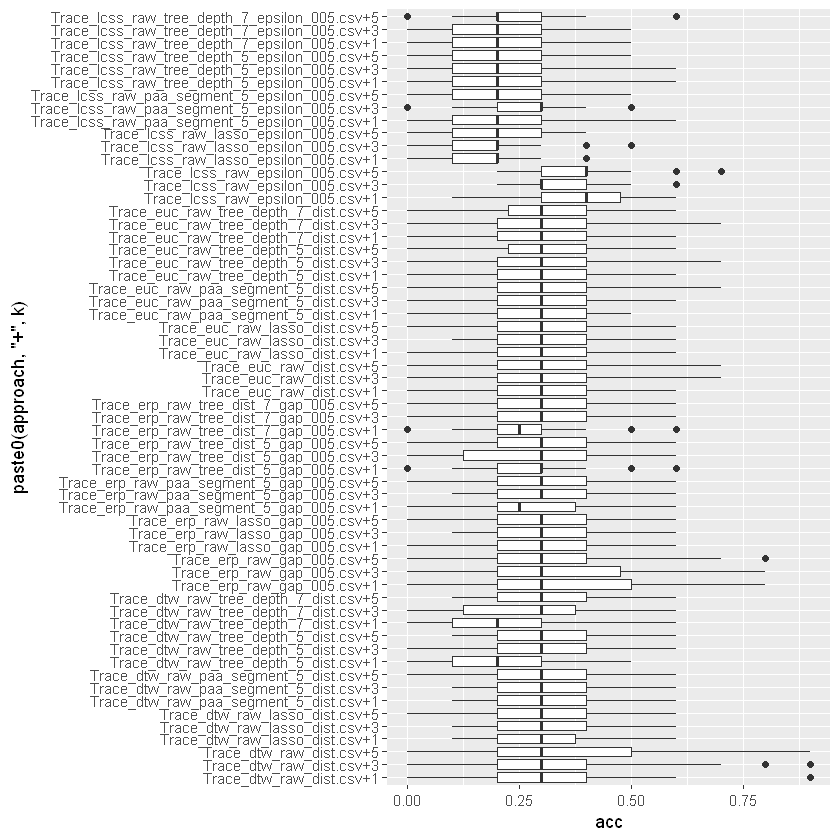

In [39]:
require(overall_resultsplot2)
ggplot(overall_results,aes(x=paste0(approach,'+',k), y=acc)) +
geom_boxplot()+
coord_flip()